In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/practice/customer_segmentation.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [ ]:
df.dropna(subset=['Segmentation','Work_Experience','Family_Size','Ever_Married','Graduated','Profession'], inplace=True)


In [ ]:
df.isnull().sum()
df.drop(columns=['Var_1'],axis=1,inplace=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Segmentation.unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

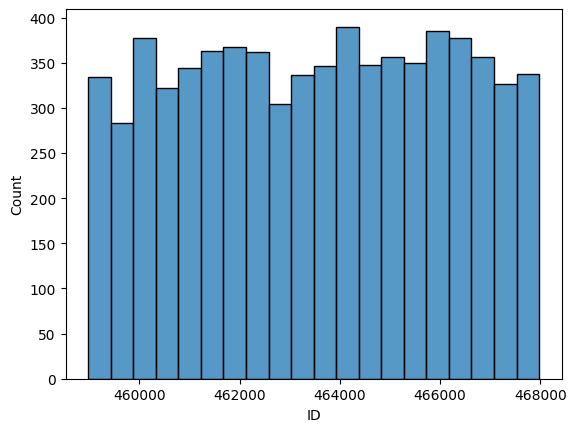

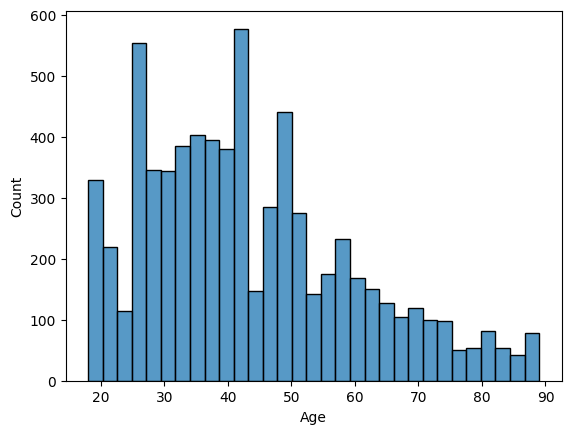

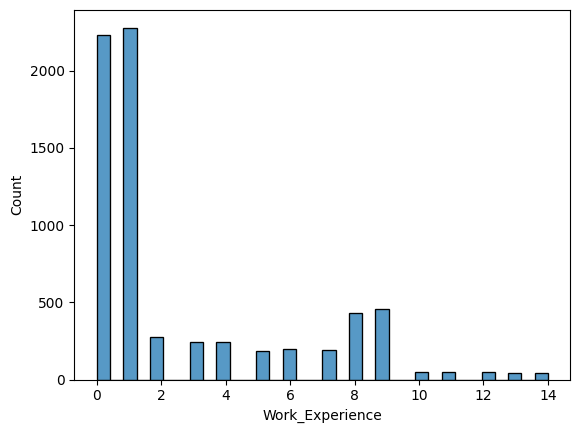

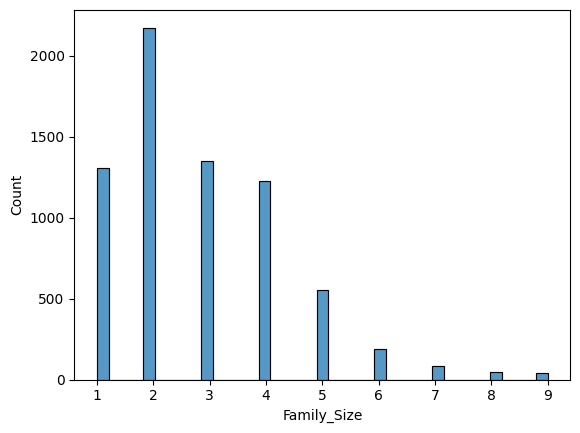

In [ ]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

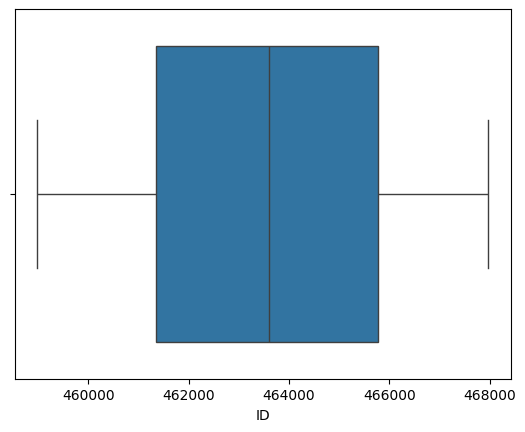

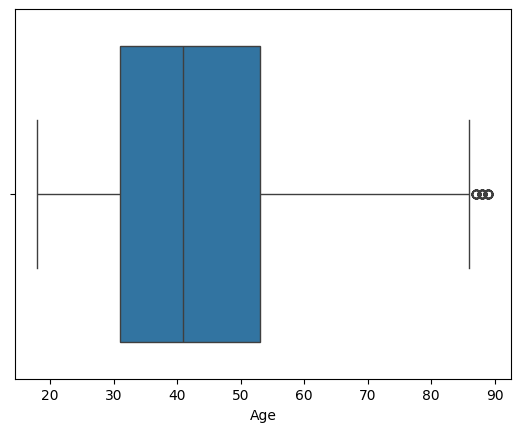

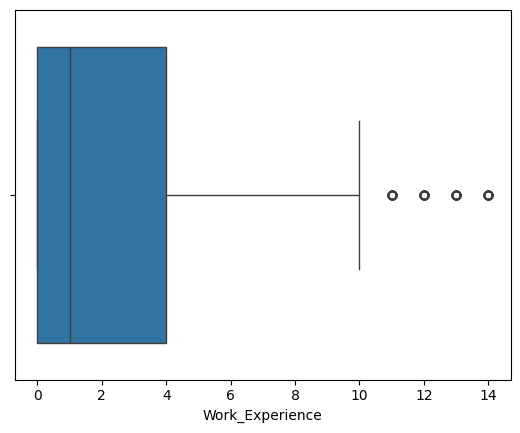

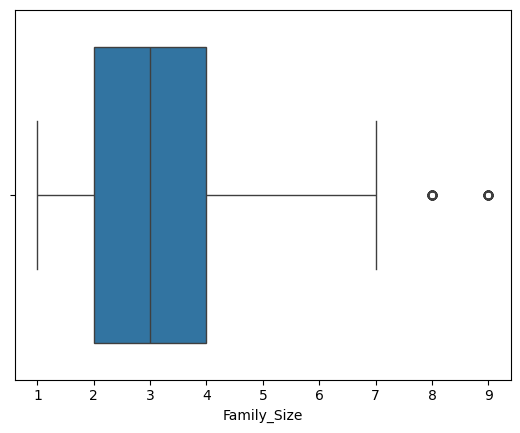

In [ ]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
def outlier_df(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw

In [ ]:
for i in ["Age","Work_Experience","Family_Size"]:
  lw,uw=outlier_df(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])


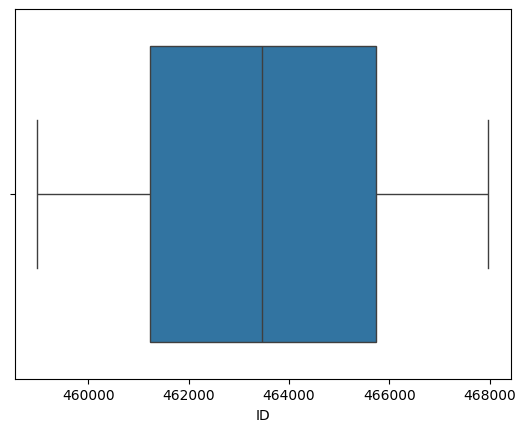

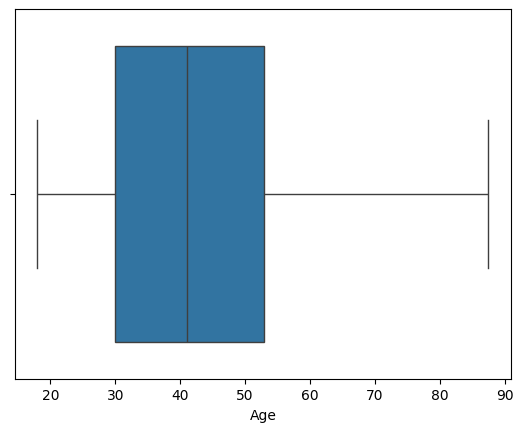

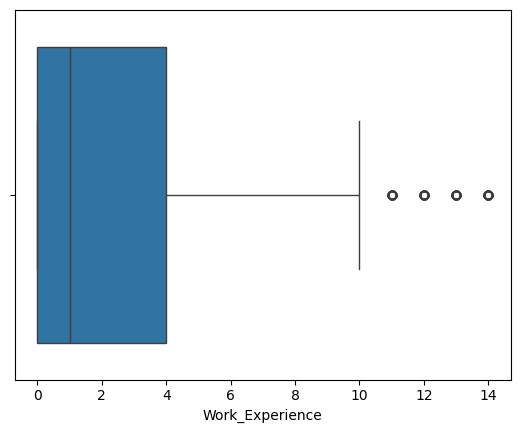

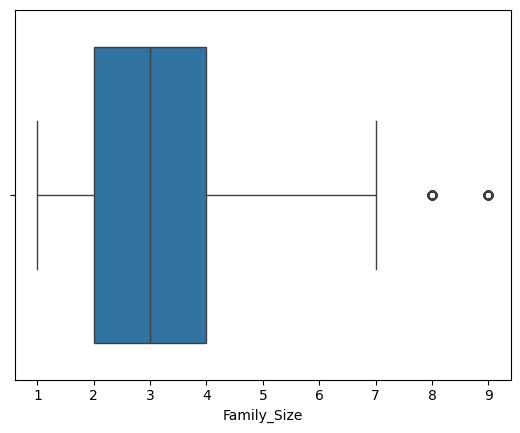

In [ ]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
for i in ["Work_Experience","Family_Size"]:
  df[i].fillna(df[i].median,inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6969 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6969 non-null   int64  
 1   Gender           6969 non-null   object 
 2   Ever_Married     6862 non-null   object 
 3   Age              6969 non-null   int64  
 4   Graduated        6909 non-null   object 
 5   Profession       6877 non-null   object 
 6   Work_Experience  6969 non-null   float64
 7   Spending_Score   6969 non-null   object 
 8   Family_Size      6969 non-null   float64
 9   Var_1            6913 non-null   object 
 10  Segmentation     6969 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 653.3+ KB


In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

for i in df.select_dtypes(include="object").columns:
    df[i] = imputer.fit_transform(df[[i]])[:, 0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Ever_Married']=labelencoder.fit_transform(df['Ever_Married'])
df['Graduated']=labelencoder.fit_transform(df['Graduated'])
df['Profession']=labelencoder.fit_transform(df['Profession'])
df['Spending_Score']=labelencoder.fit_transform(df['Spending_Score'])

df['Segmentation']=labelencoder.fit_transform(df['Segmentation'])

In [ ]:
df.drop('ID',axis=1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3
2,0,1,67,1,2,1.0,2,1.0,1
3,1,1,67,1,7,0.0,1,2.0,1
5,1,1,56,0,0,0.0,0,2.0,2
6,1,0,32,1,5,1.0,2,3.0,2
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,1
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,3
8066,0,0,27,1,5,1.0,2,4.0,1


In [ ]:
import matplotlib.pyplot as plt

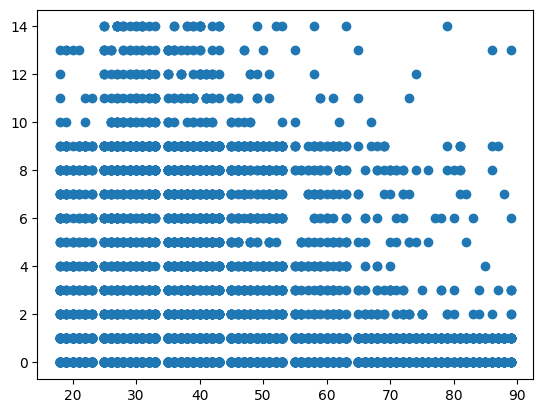

In [ ]:
plt.scatter(df['Age'],df['Work_Experience'])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X=df[['Work_Experience'],[''].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

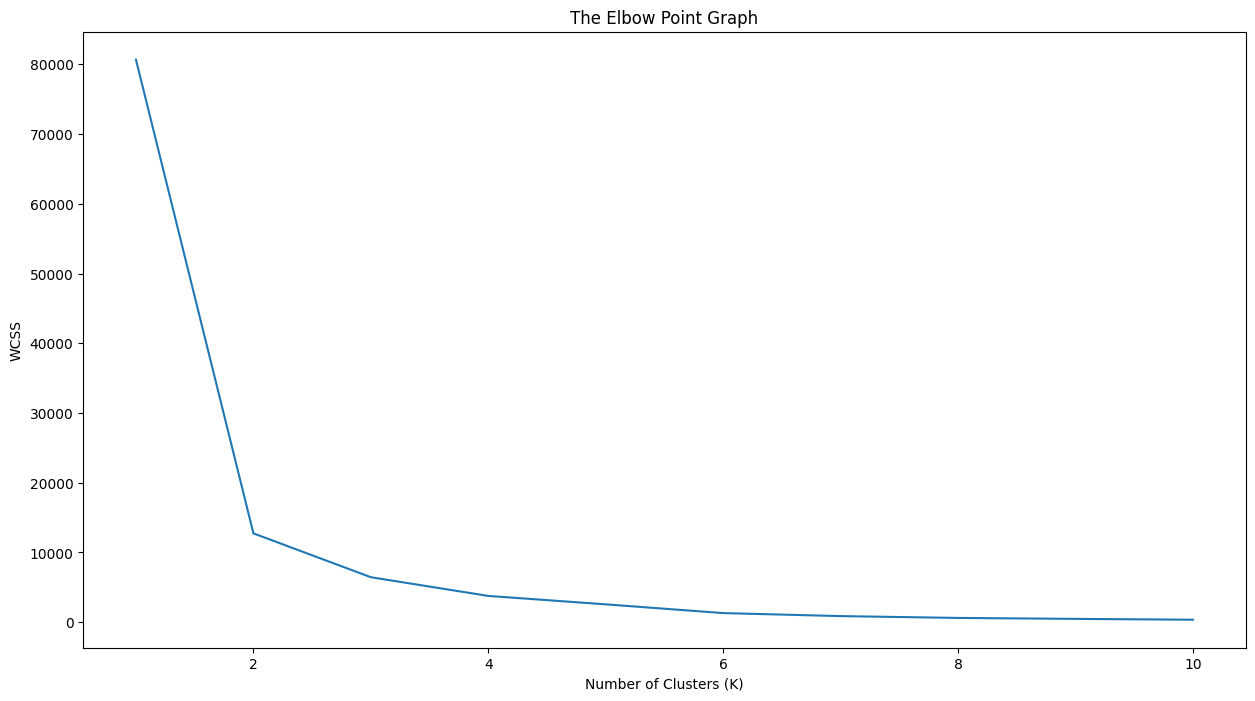

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X.reshape(-1, 1))  # Reshape X to ensure it's a 2D array
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

In [ ]:
y=kmeans.fit_predict(X.reshape(-1, 1))
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 0, ..., 4, 4, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-3.01980663e-14],
       [ 8.00000000e+00],
       [ 3.49795082e+00],
       [ 1.29777778e+01],
       [ 1.00000000e+00],
       [ 5.51679587e+00],
       [ 1.04747475e+01],
       [ 9.00000000e+00],
       [ 2.00000000e+00],
       [ 7.00000000e+00]])

In [ ]:
kmeans.labels_

array([4, 4, 0, ..., 4, 4, 0], dtype=int32)

In [ ]:

plt.figure(figsize=(7,5))

# Scatter plot
# plt.scatter(X[y==0,0],X[y==0,1],c=kmeans.labels_)
plt.scatter(X[:,0],X[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 700x500 with 0 Axes>

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

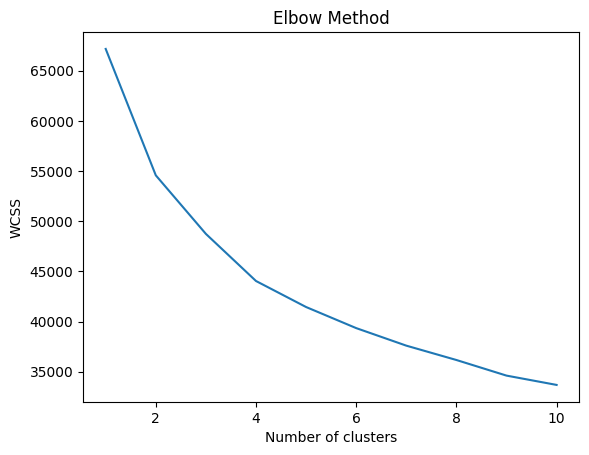

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Choose the optimal number of clusters and fit the KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the original dataset
df['Segmentation'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Inspect the clusters
print(df.groupby('Segmentation').mean())


                         ID    Gender  Ever_Married        Age  Graduated  \
Segmentation                                                                
0             463282.416304  0.434783      0.421739  37.134783   0.752174   
1             463487.781312  0.579854      0.065606  26.764082   0.234592   
2             463608.357743  0.633854      0.966387  71.560624   0.572629   
3             463498.926029  0.483601      0.460572  43.251919   0.822749   
4             463619.237271  0.596144      1.000000  47.580326   0.779041   

              Profession  Work_Experience  Spending_Score  Family_Size  
Segmentation                                                            
0               2.496739         8.818478        1.778261     2.123913  
1               4.308151         1.887343        1.977469     4.024520  
2               5.909964         1.078031        1.394958     2.106843  
3               1.206560         1.060014        1.990928     1.949756  
4               1.3321

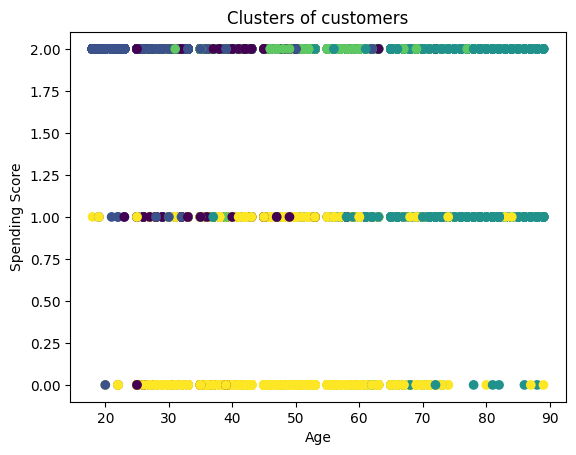

NameError: name 'new_data_point' is not defined

In [ ]:
plt.scatter(df['Age'], df['Spending_Score'], c=df['Segmentation'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters of customers')

plt.show()

# Predict the cluster for new df points
new_df_point = [[0, 1, 35, 1, 2, 10, 2, 4]]  # Example new df point
new_df_point_scaled = scaler.transform(new_data_point)
predicted_cluster = kmeans.predict(new_data_point_scaled)
print("Predicted cluster for new data point:", predicted_cluster)

In [ ]:
df1=df.copy()
df2=df1[['Work_Experience','Segmentation']]
df2

,Work_Experience,Segmentation
0,1.0,1
2,1.0,3
3,0.0,2
5,0.0,4
6,1.0,1
...,...,...
8062,0.0,4
8064,3.0,1
8065,1.0,1
8066,1.0,1


In [ ]:
df2.isnull().sum()

Work_Experience    0
Segmentation       0
dtype: int64

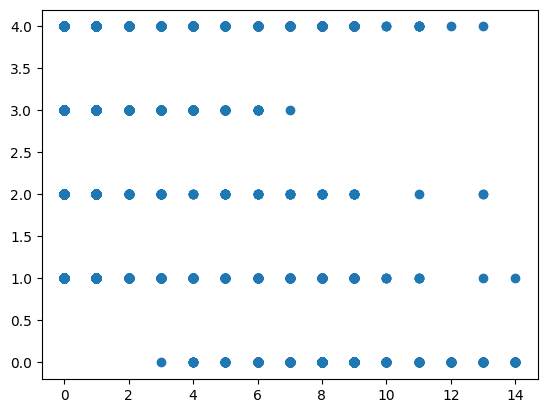

In [ ]:
plt.scatter(df2['Work_Experience'], df2['Segmentation'])

In [ ]:
standardscaler.fit(df)
scaler=standardscaler.transform(df)
scaler

array([[-0.27576737,  0.90260443, -1.20380367, ...,  0.762325  ,
         0.76039095, -0.91109195],
       [ 1.09065407, -1.10790504,  0.83070024, ...,  0.762325  ,
        -1.20913985,  0.4724333 ],
       [-0.69434598,  0.90260443,  0.83070024, ..., -0.41067073,
        -0.55262958, -0.21932932],
       ...,
       [ 0.73638222, -1.10790504, -1.20380367, ...,  0.762325  ,
        -1.20913985, -0.91109195],
       [ 1.47415626, -1.10790504, -1.20380367, ...,  0.762325  ,
         0.76039095, -0.91109195],
       [-0.63822371,  0.90260443,  0.83070024, ..., -1.58366646,
         0.10388068,  1.16419592]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaler)

PCA(n_components=2)

In [ ]:
data=pca.transform(scaler)
data

array([[ 2.37068098,  1.5495181 ],
       [-1.24934633, -1.41657694],
       [-1.01849525,  0.13002613],
       ...,
       [ 1.48287995, -1.22423935],
       [ 1.78042129,  0.08853159],
       [-1.79900253,  0.94389428]])

In [ ]:
data.shape

(6718, 2)

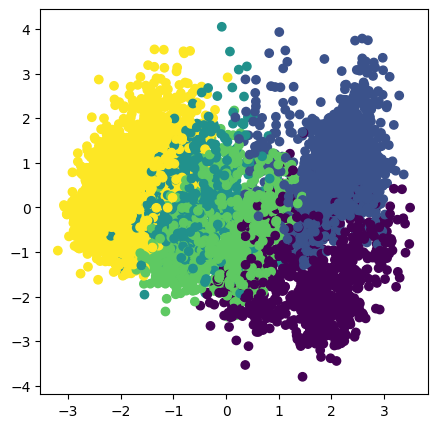

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],c=df['Segmentation'])
plt.show()


In [ ]:
X=data[:,0]
y=data[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

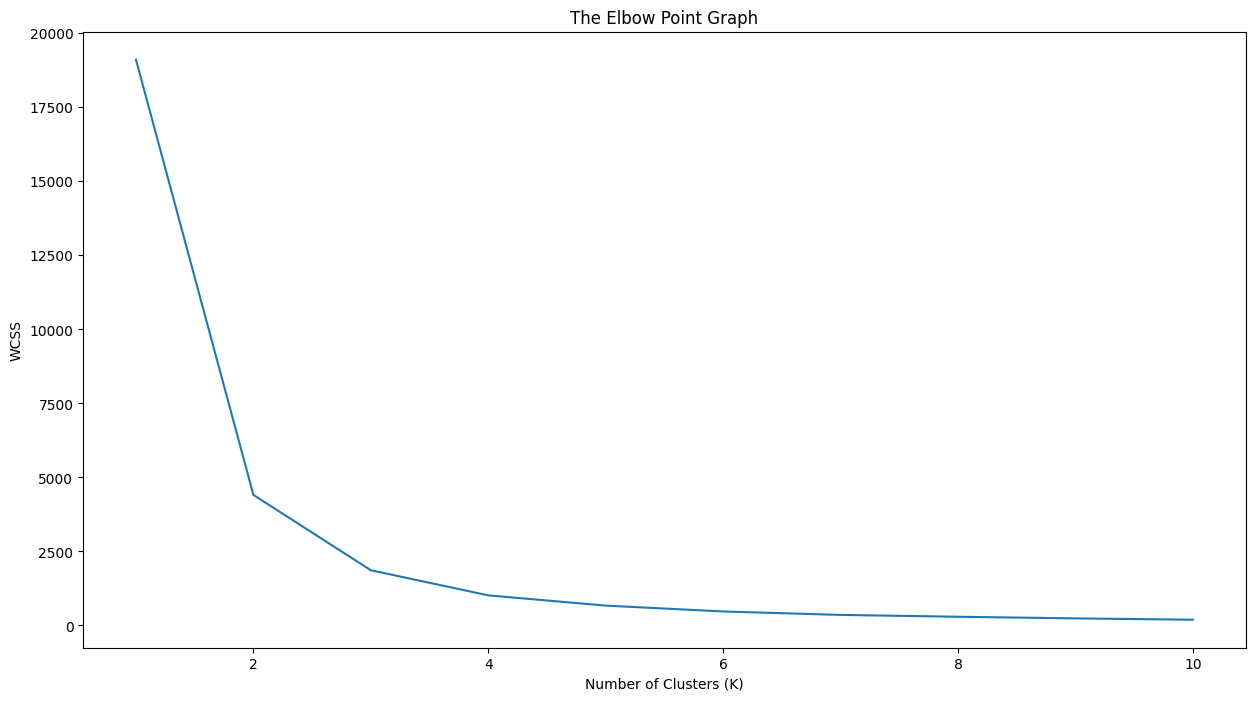

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X.reshape(-1, 1))  # Reshape X to ensure it's a 2D array
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[19107.62864709631,
 4409.208487871851,
 1865.119546125838,
 1017.0629622869895,
 671.413373092462,
 473.16097993638624,
 357.07607559022927,
 294.95070455837936,
 239.14916701646808,
 194.490905343304]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++')

y_labels=kmeans.fit_predict(X_train.reshape(-1, 1))
y_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:

X_test_reshaped = X_test.reshape(-1, 1)

y_pred = kmeans.predict(X_test_reshaped)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)